# <font color='blue'>Multiple Linear Regression

### Hemant Thapa

Regression models are used to describe relationships between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.

Multiple linear regression is a type of regression analysis that is used to model the relationship between one dependent (response) variable and two or more independent (predictor) variables. It assumes a linear relationship between the predictors and the response variable, and models this relationship using a set of coefficients. The goal of multiple linear regression is to find the best-fitting line (i.e., the line that minimizes the difference between the predicted values and the true values) that describes this relationship.

Multiple linear regression works by fitting a linear equation to the data, where the response variable is modeled as a linear combination of the predictors. The coefficients of the equation are estimated from the training data, and the equation can then be used to make predictions on new, unseen data.

For example, if we have data on the size of houses and their prices, we could use multiple linear regression to model the relationship between the size of the houses (predictors) and their prices (response variable). The fitted equation would take the form of:

price = β0 + β1 * size1 + β2 * size2 + ... + βp * sizep

where β0, β1, β2, ..., βp are the coefficients of the equation, size1, size2, ..., sizep are the predictors, and price is the response variable. The goal of multiple linear regression is to find the coefficients that best fit the data, so that we can use the equation to make predictions on new, unseen data.





## LIBRARIES

In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 1. from sklearn.model_selection import train_test_split

The train_test_split function from the sklearn.model_selection module is used for splitting a dataset into two parts: a training set and a test set. The training set is used for training a machine learning model, while the test set is used for evaluating its performance. This helps in preventing overfitting, where a model performs well on the training data but poorly on unseen data.

### 2. from sklearn.preprocessing import MinMaxScaler, StandardScaler

The MinMaxScaler and StandardScaler classes from the sklearn.preprocessing module are used for normalizing the features of a dataset.

MinMaxScaler scales the features of a dataset to a given range, usually between 0 and 1.

StandardScaler scales the features of a dataset so that they have zero mean and unit variance. This is often used for algorithms that are sensitive to the scale of the input features.

### 3. from sklearn.linear_model import LinearRegression

The LinearRegression class from the sklearn.linear_model module implements linear regression. It is a supervised machine learning algorithm used for regression problems, where the goal is to predict a continuous target variable based on one or more independent variables (features).

Linear regression models the relationship between the target variable and the features as a linear equation. The goal is to find the best-fitting line (i.e., the line that minimizes the difference between the predicted values and the true values). The coefficients of the line are learned from the training data, and then used to make predictions on new, unseen data.

### 4.from sklearn.metrics import mean_squared_error, r2_score 

The mean_squared_error and r2_score functions from the sklearn.metrics module are used for evaluating the performance of a regression model.

mean_squared_error calculates the mean squared error between the true target values and the predicted values. The mean squared error is the average of the squared differences between the predictions and the true values, and it is used as a measure of the quality of the regression model.

r2_score calculates the R² (coefficient of determination) regression score. It is a statistical measure of how well the regression model fits the data. The R² score lies between 0 and 1, where 1 means the model fits the data perfectly, and 0 means the model predicts the mean of the target variable for all inputs.

## DATASET 1

In [382]:
X = [1,2,3,4,5,6,7,8,6,7]
y = [0,0,0,0,0,1,1,1,1,1]

#### Shuffle is equal to False and test size 0.2

In [383]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 shuffle=False)

In [384]:
#which prints: (notice there are no 0 labels in the test set)
print(f"y_train {y_train}")
print(f"y_test {y_test}")

y_train [0, 0, 0, 0, 0, 1, 1, 1]
y_test [1, 1]


#### Shuffle is equal to True and test size 0.2

In [385]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 shuffle=True)

In [386]:
#notice there is now a 0 label in the test set
print(f"y_train {y_train}")
print(f"y_test {y_test}")

y_train [0, 0, 1, 1, 0, 0, 0, 1]
y_test [1, 1]


#### Test size 0.5

A further way to ensure that data is represented equally in both the training and testing data is to make use of the stratify parameter. This ensures that labels are represented in as close to the same proportions as possible in both the training and testing data.

In [387]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size= 0.5,
shuffle=True, stratify=y)
#note that the labels are now distributed in the same proportion across thetrain and test sets

In [388]:
#notice there is now a 0 label in the test set
print(f"y_train {y_train}")
print(f"y_test {y_test}")

y_train [1, 1, 0, 0, 1]
y_test [0, 0, 1, 0, 1]


### DATSET2 - Simple Multiple Linear Regression

In [479]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The index_col parameter in the pd.read_csv function is used to specify the index column of the resulting DataFrame. The index is used to identify each row in the DataFrame, and can be used for slicing, merging, and joining operations.

In the code, index_col=0 specifies that the first column of the CSV file should be used as the index of the DataFrame. This means that the first column of the file will not be included as a regular data column, but rather will be used as the index of the resulting DataFrame.

### TV simple Linear Model

In [480]:
#columns tv
x = data.iloc[:,0]
x = x.values.reshape(-1,1)
x[0:5]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8]])

In [481]:
#Columns 
y = data.iloc[:,3]
y = y.values.reshape(-1,1)
y[0:5]

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9]])

 1.  y = data.iloc[:,0] - This line is assigning the first column of the data DataFrame to the variable "y". 
The ".iloc" accessor is used to index the DataFrame, and ":0" specifies the first column (the first column has index 0).

2. y = data.values.reshape(-1,1) - This line is reassigning the variable "y" to the same data, but reshaped into a numpy array with shape (-1,1). The ".values" accessor returns the underlying numpy array representation of the DataFrame. The "reshape" method is used to specify the desired shape of the array, in this case (-1,1) meaning an unknown number of rows (specified by -1) and 1 column.

3. y[0:5] - This line is indexing the first 5 elements of the array assigned to "y". The result will be a numpy array with shape (5,1).

In [482]:
#Creating a Linear Regression model
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [483]:
y_pred = model.predict(x)
y_pred[0:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

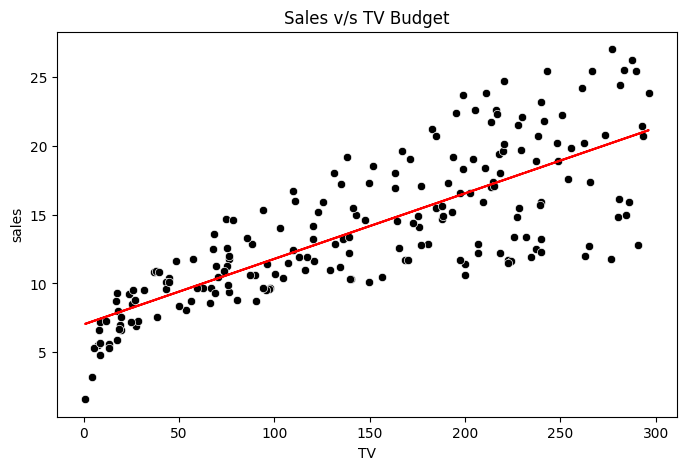

In [484]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='TV',y='sales', color='black')
plt.plot(x,y_pred, color='red')
plt.title('Sales v/s TV Budget')
plt.show()
plt.close()

In [485]:
#Coefficients
print('Coefficents: \n', model.coef_)

Coefficents: 
 [[0.04753664]]


#### Radio Simple Linear Regression

In [486]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Radio columns

In [487]:
#iloc[row,columns]
x = data.iloc[:,1]
x = x.values.reshape(-1,1)
x[0:5]

array([[37.8],
       [39.3],
       [45.9],
       [41.3],
       [10.8]])

#### Sales columns

In [488]:
y = data.iloc[:,3]
y = y.values.reshape(-1,1)
y[0:5]

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9]])

In [489]:
#Creating Linear Regression Model
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [490]:
y_pred = model.predict(x)
y_pred[0:5]

array([[16.96597871],
       [17.26972238],
       [18.60619455],
       [17.67471395],
       [11.49859256]])

In [491]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


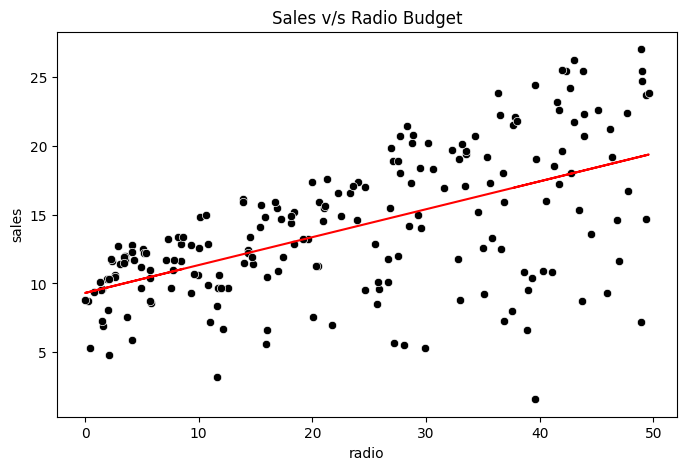

In [492]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='radio', y='sales', color='black')
plt.plot(x, y_pred, color='red')
plt.title('Sales v/s Radio Budget')
plt.show()
plt.close()

In [493]:
#Coefficients
print('Coefficents: \n', model.coef_)

Coefficents: 
 [[0.20249578]]


### Newspaper Simple Linear Model

In [494]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [495]:
x = data.iloc[:,2]
x = x.values.reshape(-1,1)
x[0:5]

array([[69.2],
       [45.1],
       [69.3],
       [58.5],
       [58.4]])

In [496]:
y = data.iloc[:,3]
y = y.values.reshape(-1,1)
y[0:5]

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9]])

In [497]:
#Creating Linear Regression model
model = LinearRegression()
#Training the model
model.fit(x,y)

LinearRegression()

In [498]:
#Prediction
y_pred = model.predict(x)
y_pred[0:5]

array([[16.13616948],
       [14.81806581],
       [16.14163879],
       [15.55095333],
       [15.54548402]])

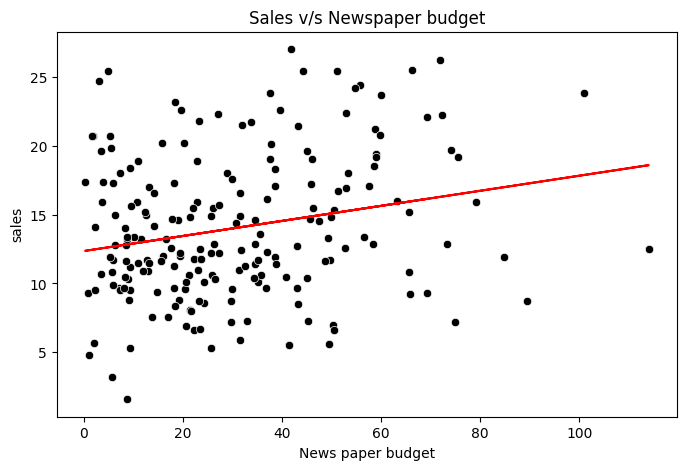

In [499]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='newspaper', y='sales', color='black')
plt.plot(x, y_pred, color='red')
plt.title('Sales v/s Newspaper budget')
plt.xlabel('News paper budget')
plt.show()
plt.close()

In [500]:
#The Coefficients
print('Coefficients: \n',model.coef_)

Coefficients: 
 [[0.0546931]]


#### Multiple Linear Regression 

In [501]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [502]:
X = data.iloc[:,[0,1,2]]
X[0:4]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5


In [503]:
X = data.iloc[:,[0,1,2]].values
X[0:5]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

#### Assigns values of the first, second, and third columns of the "data" DataFrame to a new NumPy array "X".

In [504]:
X = X.reshape(-1,3)
X[0:5]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

In [505]:
y = data.iloc[:,3]
y = y.values.reshape(-1,1)
y[0:5]

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9]])

In [506]:
#Creating linear Regression model
model = LinearRegression()

In [507]:
#Training model
model.fit(X,y)

LinearRegression()

In [508]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]


In [561]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Training and Test Samples

1. Imports the train_test_split function from the sklearn.model_selection module.

2. Splits the data into training and testing sets using the train_test_split function. The test data size is set to 25% with test_size=0.25.

3. Prints the shapes of the training and testing data.

4. Fits a linear regression model to the training data using the fit method of the LinearRegression class.

5. Makes predictions on the test data using the predict method of the LinearRegression model.

6. Calculates the error between the actual test values and the predictions using y_test - predictions.

7. Plots the test data and the error bars using the errorbar function from the matplotlib library.

In [562]:
from sklearn.model_selection import train_test_split

The line X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25) is splitting the data into training and testing sets.

train_test_split is a function from the model_selection module of scikit-learn library which is used to split the input data into two parts, training data and testing data.

Here, X and y are the features and target variables respectively. The function train_test_split splits the data into two parts, with test_size=0.25 meaning that 25% of the data will be used for testing and the remaining 75% will be used for training. The split data is stored in four variables: X_train, X_test, y_train, and y_test.

X_train and y_train will be used to train a machine learning model, while X_test and y_test will be used to evaluate the performance of the model. This split is useful to evaluate the model's performance on unseen data and prevent overfitting.

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [564]:
data.shape

(200, 4)

#### Using test size 0.25 in our data of 200 items into a training set of 150 observations and three columns, and as test set of 50 observations.


In [565]:
print('Training data:', X_train.shape, y_train.shape)

Training data: (150, 3) (150, 1)


In [566]:
print('Test data:', X_test.shape, y_test.shape)

Test data: (50, 3) (50, 1)


Yes, by default train_test_split splits the data randomly. The function randomly selects observations from the input data X and y and assigns them to either the training set (X_train, y_train) or the testing set (X_test, y_test) based on the specified test size (test_size = 0.25 in this case). This helps to ensure that the training and testing sets are representative of the overall data and reduces the risk of overfitting or underfitting the model.

#### Choosing data randomly has several advantages:

Generalization: By randomly splitting the data into training and testing sets, the model is trained on a diverse set of examples and can learn to generalize to new, unseen examples.

Reducing Bias: Randomly selecting observations helps to ensure that both the training and testing sets are representative of the overall data and reduces the risk of overfitting the model to a specific subset of the data.

Cross-Validation: In cross-validation, the data is divided into multiple folds and each fold is used as a testing set once. By randomly selecting the folds, the model can be trained and evaluated multiple times on different subsets of the data, providing a more robust evaluation of its performance.

Therefore, random sampling of data is a widely used method in machine learning to evaluate the performance of models and to ensure their generalization to new, unseen data.

#### Reading pattern, there is no pattern cuz data is selected randomly

In [567]:
X[0:2]

array([[177.177,  29.106,  53.284],
       [ 34.265,  30.261,  34.727]])

In [568]:
X_train[0:2]

array([[ 84.546,  36.806,  39.578],
       [165.319,  18.48 ,   3.08 ]])

In [569]:
X_test[0:2]

array([[150.458,  36.729,  40.733],
       [  6.699,  37.653,  57.75 ]])

In [570]:
y[0:2]

array([[22.1],
       [10.4]])

In [571]:
y_test[0:2]

array([[22.4],
       [ 7.2]])

In [572]:
y_train[0:2]

array([[16.7],
       [17.4]])

### Fit the Model on the training data:

This is data look like after train_test_split splits the data into two parts, with test_size=0.25 meaning that 25% of the data will be used for testing and the remaining 75% will be used for training. The split data is stored in four variables: X_train, X_test, y_train, and y_test.

In [573]:
print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (150, 3) (150, 1)
Test data: (50, 3) (50, 1)


In [574]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [575]:
X_train[0:5]

array([[ 84.546,  36.806,  39.578],
       [165.319,  18.48 ,   3.08 ],
       [177.177,  29.106,  53.284],
       [171.248,   2.618,  10.087],
       [ 20.636,  25.41 ,  14.861]])

In [576]:
X_test[0:5]

array([[150.458,  36.729,  40.733],
       [  6.699,  37.653,  57.75 ],
       [ 58.135,   8.316,   4.62 ],
       [135.289,  11.858,   1.848],
       [ 15.092,  15.477,  13.09 ]])

In [577]:
y_train[0:5]

array([[16.7],
       [17.4],
       [22.1],
       [11.5],
       [ 8.8]])

In [578]:
y_test[0:5]

array([[22.4],
       [ 7.2],
       [ 9.9],
       [14.1],
       [ 7.6]])

In [579]:
# Fit Model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [580]:
predictions[0:5]

array([[20.75846693],
       [11.99748162],
       [ 8.45625429],
       [14.08789961],
       [ 7.4336048 ]])

### Plot the errors

#### yerr refers to the error in the y-axis values in a plot. It represents the uncertainty or deviation from the actual value of the y-axis. The yerr value is typically used to create error bars in the plot, showing the uncertainty or variability of the y-axis data.

In [587]:
yerr=(y_test-predictions)
yerr

array([ 0.37559957, -3.0268553 ,  0.13179317,  0.26994243, -0.22113766,
       -0.88838466, -0.93019791,  1.95206024, -1.39749058, -0.03445202,
       -2.37147291,  1.48780705,  0.86136056, -2.21331068,  1.76577615,
        1.93365939, -1.04206251, -0.19406528, -3.61549718,  1.46612696,
        2.40144614, -1.31022932,  0.25806031,  1.74409865,  0.96190512,
        0.64170666,  0.18037058, -1.48168151, -0.48093585,  0.85261851,
        1.51292108,  0.19804225, -2.70912136,  0.04950375, -0.85664657,
        0.15472949, -0.78477408,  2.18295714,  0.28455457, -1.42225296,
        2.33804869,  1.36330198,  0.232858  ,  0.96683243,  0.06626948,
       -3.07239391,  1.15599715,  0.25816117,  0.58840789,  1.53519824])

#### 'yerr' must not contain negative values" means that one or more values in the yerr parameter passed to plt.errorbar is negative, which is not allowed in this function.

In this case, the yerr parameter represents the vertical error bars that are plotted around the data points. Negative values do not make sense in this context and are therefore not allowed.

you need to make sure that all values in the yerr parameter are non-negative. One approach to achieve this is to use the absolute value of yerr, like this:

#### 'x' and 'y' must have the same size" means that the x and y arrays passed to the plt.errorbar function are not of the same length. This is not allowed in plt.errorbar because the number of x values must match the number of y values in order to plot the data correctly.

make sure that the range(1,52) and y_test arrays have the same number of elements. If the number of elements in y_test is n, then range(1,52) should be range(1,n+1).

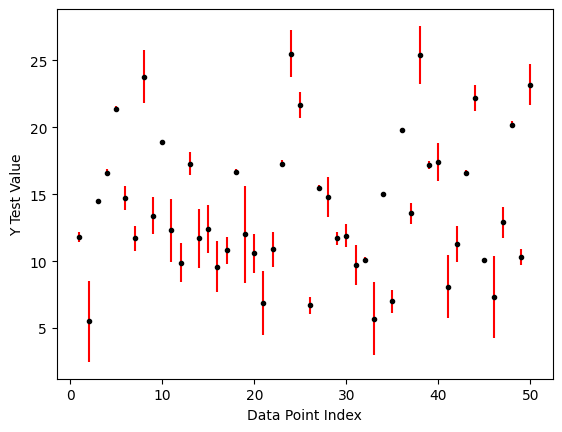

In [602]:
yerr = np.abs(y_test - predictions)
plt.errorbar(range(1,len(y_test)+1), y_test, yerr=yerr, fmt='.k', ecolor='red')
plt.xlabel("Data Point Index")
plt.ylabel("Y Test Value")
plt.show()
plt.close()

In [603]:
print('Score:', model.score(X_test, y_test))

Score: 0.9188705937003876


#### This score is quite close to 1, which suggests that our model fits our observations quite well.